# projet : Dépenses et recettes de l'Assurance chômage

### Description
Ces données informent sur la décomposition des recettes totales et des dépenses totales de l'Assurance chômage depuis 2011.

- Définitions

- Recettes (M€)


Contributions : Contributions d'Assurance chômage assises sur les salaires bruts.
Contribution Sociale Généralisée (CSG) : Part de la CSG sur les revenus d'activité reçue en compensation de l'ancienne part salariale.
Autres recettes : Autres produits perçus dont contribution CSP (contrat de sécurisation professionnelle).

- Dépenses(M€)

Allocations brutes et aides : Allocations versées (ARE, AREF, ASP, AREP, ATI et autres allocations) et aides versées (ARCE et autres aides).
- Caisse de retraite : Financement net des points de retraite complémentaire des demandeurs d’emploi indemnisés : l'Unédic finance une partie des points retraites obtenus par les allocataires durant leurs périodes d'indemnisation.
-  Activité partielle : Dépenses d'activité partielle de l'Unédic.
 - Financement Pôle emploi et frais de recouvrement : Dépenses de l'Unédic pour assurer le financement de Pôle Emploi (à hauteur de 11% des recettes en n-2 depuis 2019) et les charges associées au recouvrement des contributions.
- Autres dépenses : Frais de gestion et charges financières.
- Solde technique : Différence entre les recettes totales et les dépenses totales.
- Éléments exceptionnels : Produits et charges résultants d'évènements non récurrents.
- Solde financier : Solde après intégration des éléments exceptionnels.
- Dette : Encours total de dette moins la trésorerie disponible

#### Problématique
Comment ont évolué les recettes, les dépenses et le solde financier de l’Assurance chômage depuis 2011, et quelles sont les tendances ou déséquilibres majeurs qui pourraient guider des décisions de politique publique ?

## 1. Importation et exploration des données


### 1-1-Charger les bibiothèque et Données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
df_ach = pd.read_csv('financement-de-l-assurance-chomage.csv',sep=";")
df_ach

,﻿Année,Recettes - total (M€),Recettes - contributions principales,Recettes - CSG (M€),Recettes - Autres (M€),Dépenses - Total (M€),Dépenses - allocations brutes (M€) et aides,Dépenses - Retraites (M€),Dépenses - Activité partielle (M€),Dépenses - Financement Pôle Emploi et frais de recouvrement (M€),Dépenses - Autres (M€),Solde technique (M€),Eléments exceptionnels (M€),Solde financier (M€),Dette (M€)
0,2012,32466,31748,NaN,718,35193,30178,1693,45,3140,137,-2727,-38,-2765,-13791
1,2015,34520,33379,NaN,1142,38769,32760,2043,172,3342,452,-4249,-154,-4403,-25730
2,2016,35146,34091,NaN,1055,39503,33502,2079,64,3419,438,-4357,45,-4312,-29985
3,2018,38322,37658,NaN,664,40126,34182,2019,37,3466,423,-1805,22,-1783,-35531
4,2020,35801,22406,12841.0,554,53232,39022,2296,7454,4209,251,-17431,70,-17361,-54611
5,2021,40143,24714,14659.0,770,49395,38398,2565,3906,4312,214,-9252,0,-9252,-63639
6,2022,44447,27737,16234.0,476,40137,33437,2167,213,3914,406,4310,0,4310,-60714
7,2011,31855,31193,NaN,661,33419,28544,1604,40,3030,202,-1565,-895,-2460,-11026
8,2013,33274,32319,NaN,955,37271,31746,1948,56,3249,271,-3997,200,-3797,-17588
9,2014,33936,32916,NaN,1020,37746,32149,1938,3,3289,368,-3810,71,-3739,-21327


In [9]:
df_ach.head()

,﻿Année,Recettes - total (M€),Recettes - contributions principales,Recettes - CSG (M€),Recettes - Autres (M€),Dépenses - Total (M€),Dépenses - allocations brutes (M€) et aides,Dépenses - Retraites (M€),Dépenses - Activité partielle (M€),Dépenses - Financement Pôle Emploi et frais de recouvrement (M€),Dépenses - Autres (M€),Solde technique (M€),Eléments exceptionnels (M€),Solde financier (M€),Dette (M€)
0,2012,32466,31748,NaN,718,35193,30178,1693,45,3140,137,-2727,-38,-2765,-13791
1,2015,34520,33379,NaN,1142,38769,32760,2043,172,3342,452,-4249,-154,-4403,-25730
2,2016,35146,34091,NaN,1055,39503,33502,2079,64,3419,438,-4357,45,-4312,-29985
3,2018,38322,37658,NaN,664,40126,34182,2019,37,3466,423,-1805,22,-1783,-35531
4,2020,35801,22406,12841.0,554,53232,39022,2296,7454,4209,251,-17431,70,-17361,-54611


In [10]:
df_ach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ﻿Année                                                            13 non-null     int64  
 1   Recettes - total (M€)                                             13 non-null     int64  
 2   Recettes - contributions principales                              13 non-null     int64  
 3   Recettes -  CSG (M€)                                              5 non-null      float64
 4   Recettes - Autres (M€)                                            13 non-null     int64  
 5   Dépenses - Total (M€)                                             13 non-null     int64  
 6   Dépenses - allocations brutes (M€) et aides                       13 non-null     int64  
 7   Dépenses - Retraites (M€)            

In [11]:
df_ach.dtypes

﻿Année                                                                int64
Recettes - total (M€)                                                 int64
Recettes - contributions principales                                  int64
Recettes -  CSG (M€)                                                float64
Recettes - Autres (M€)                                                int64
Dépenses - Total (M€)                                                 int64
Dépenses - allocations brutes (M€) et aides                           int64
Dépenses - Retraites (M€)                                             int64
Dépenses - Activité partielle (M€)                                    int64
Dépenses - Financement Pôle Emploi et frais de recouvrement (M€)      int64
Dépenses - Autres (M€)                                                int64
Solde technique (M€)                                                  int64
Eléments exceptionnels (M€)                                           int64
Solde financ

In [13]:
#verifier le nombre de column et les lignes
df_ach.shape

(13, 15)

### Nettoyage & préparation

In [18]:
#nombre de données manquantes
df_ach.isna().sum().sum()

8

<Axes: >

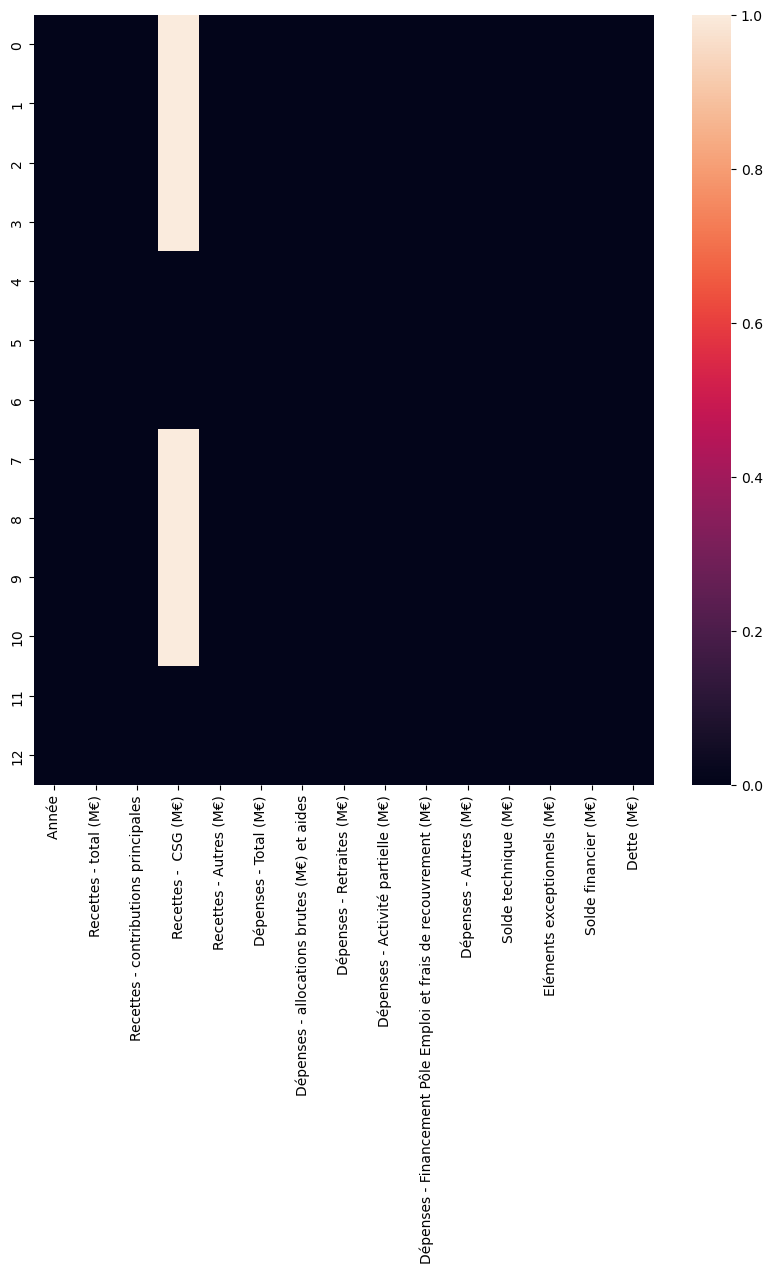

In [15]:
# visualizer ces données manquantes 
plt.figure(figsize=(10,10))
sns.heatmap(df_ach.isna())

<Axes: >

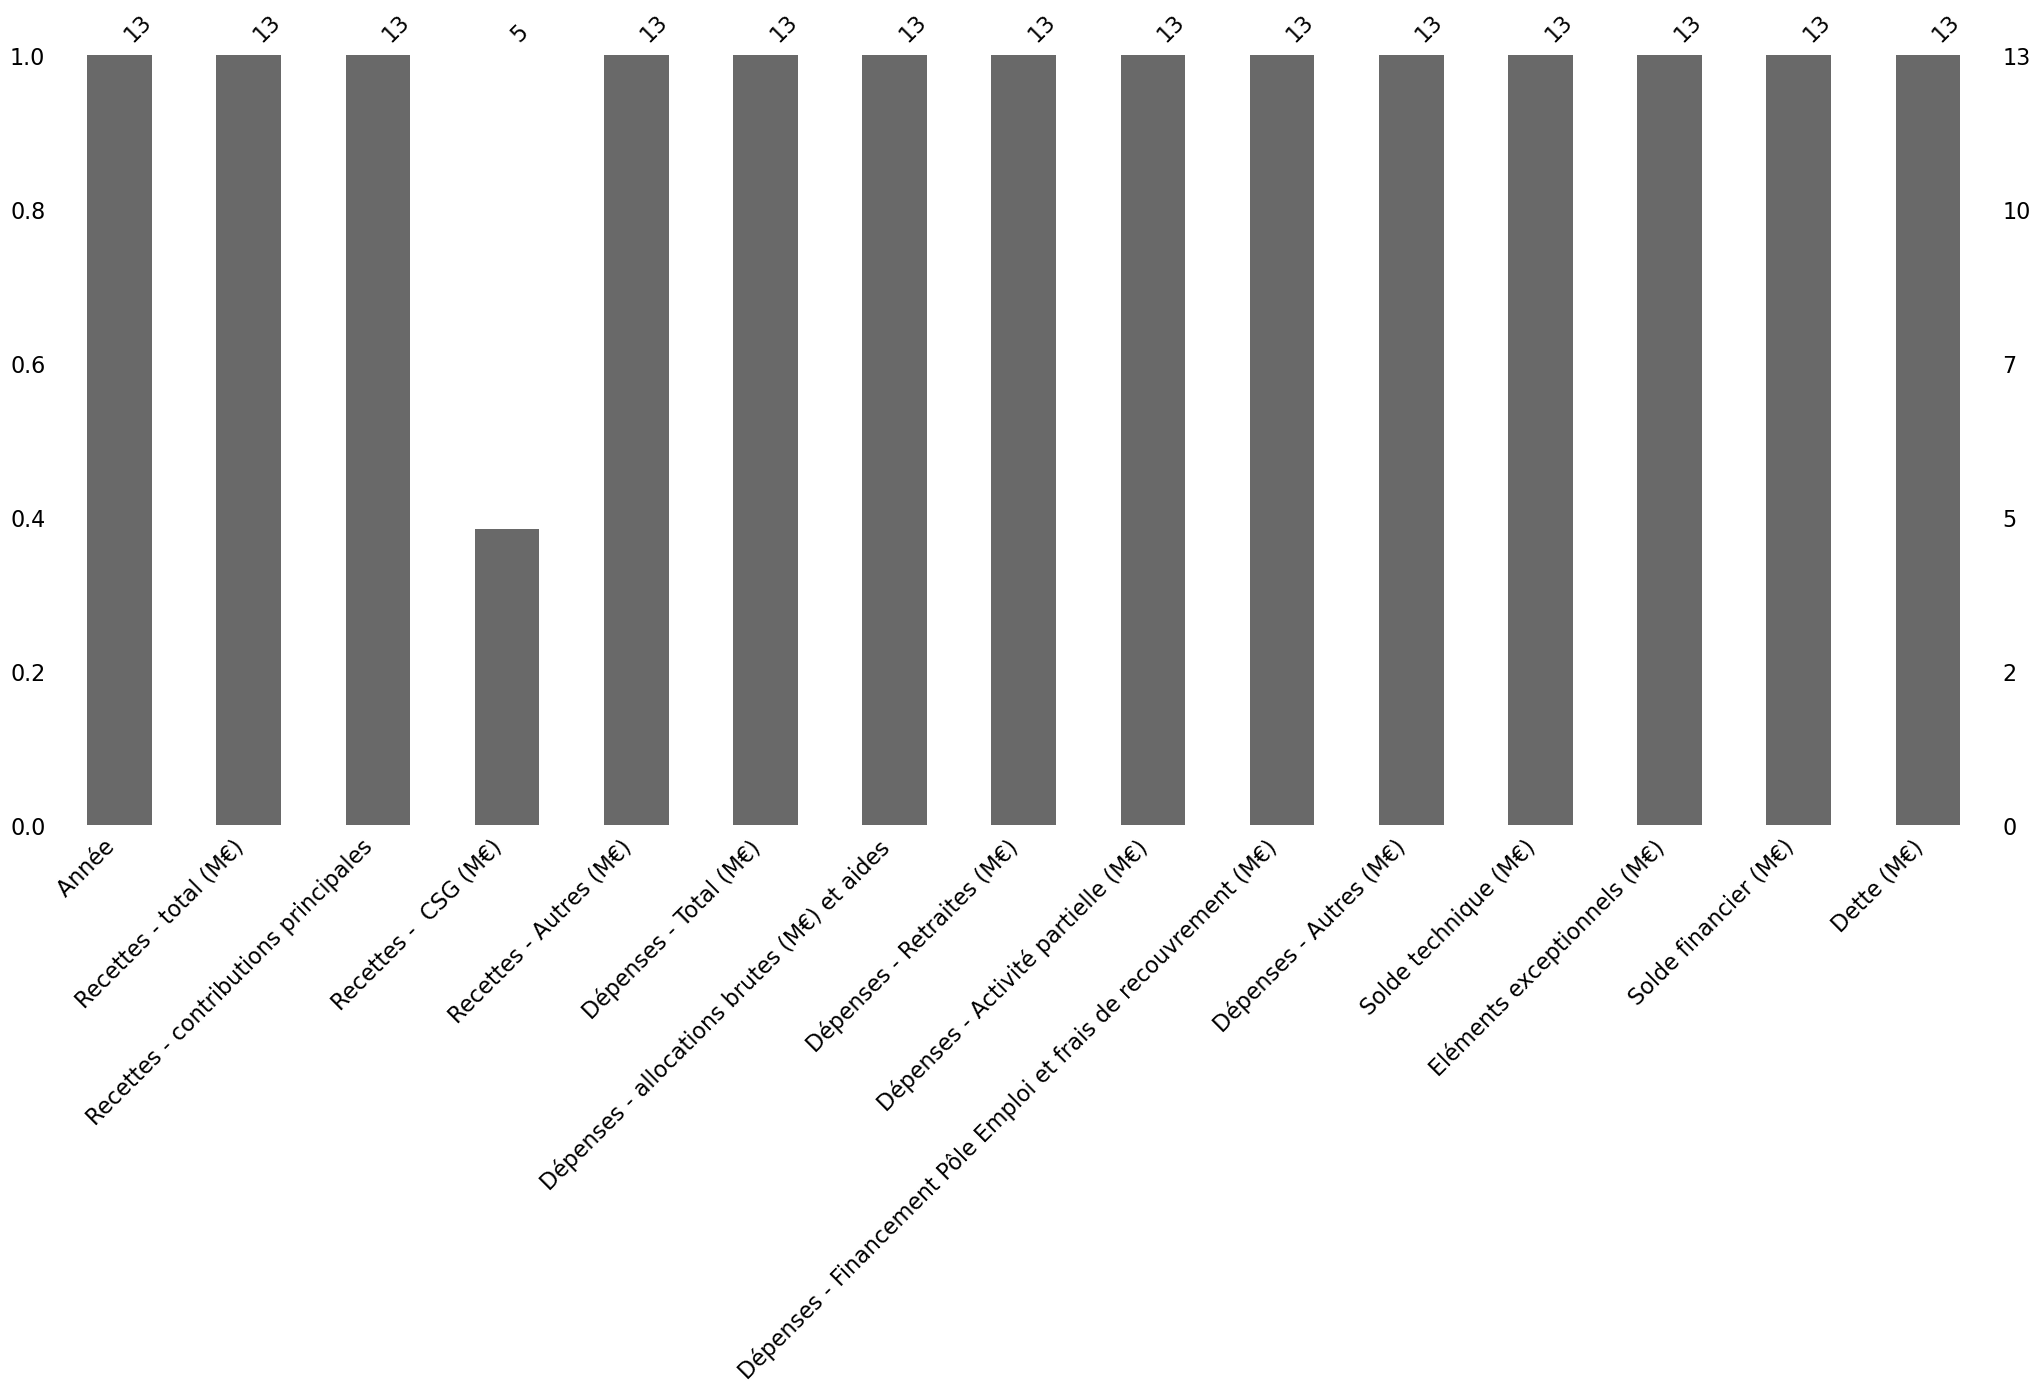

In [19]:
import missingno as mno
mno.bar(df_ach)

In [20]:
# calcul de données manquantes en pourcentage
df_ach.isna().sum().sum()/(13*15)*100


4.102564102564102

In [22]:
# Nettoyage des colonnes
df_ach.columns = df_ach.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("€", "").str.replace("-", "_")

In [23]:
df_ach.head()

,﻿année,recettes___total_m,recettes___contributions_principales,recettes____csg_m,recettes___autres_m,dépenses___total_m,dépenses___allocations_brutes_m_et_aides,dépenses___retraites_m,dépenses___activité_partielle_m,dépenses___financement_pôle_emploi_et_frais_de_recouvrement_m,dépenses___autres_m,solde_technique_m,eléments_exceptionnels_m,solde_financier_m,dette_m
0,2012,32466,31748,NaN,718,35193,30178,1693,45,3140,137,-2727,-38,-2765,-13791
1,2015,34520,33379,NaN,1142,38769,32760,2043,172,3342,452,-4249,-154,-4403,-25730
2,2016,35146,34091,NaN,1055,39503,33502,2079,64,3419,438,-4357,45,-4312,-29985
3,2018,38322,37658,NaN,664,40126,34182,2019,37,3466,423,-1805,22,-1783,-35531
4,2020,35801,22406,12841.0,554,53232,39022,2296,7454,4209,251,-17431,70,-17361,-54611


### Visualisations des tendances

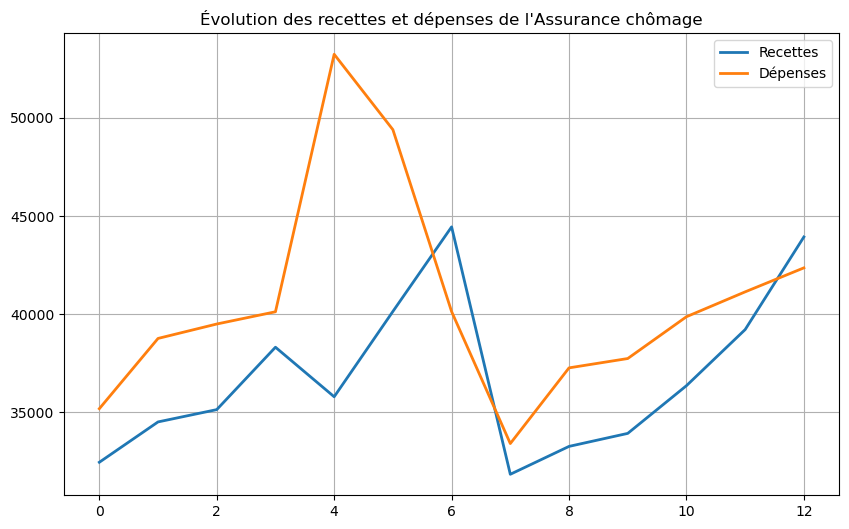

In [28]:
plt.figure(figsize=(10,6))
plt.plot(df_ach.index, df_ach['recettes___total_m'], label='Recettes', linewidth=2)
plt.plot(df_ach.index, df_ach['dépenses___total_m'], label='Dépenses', linewidth=2)
plt.title("Évolution des recettes et dépenses de l'Assurance chômage")
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df_ach.index.year, df_ach['solde_financier_m'], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Solde financier annuel")
plt.ylabel("M€")
plt.show()

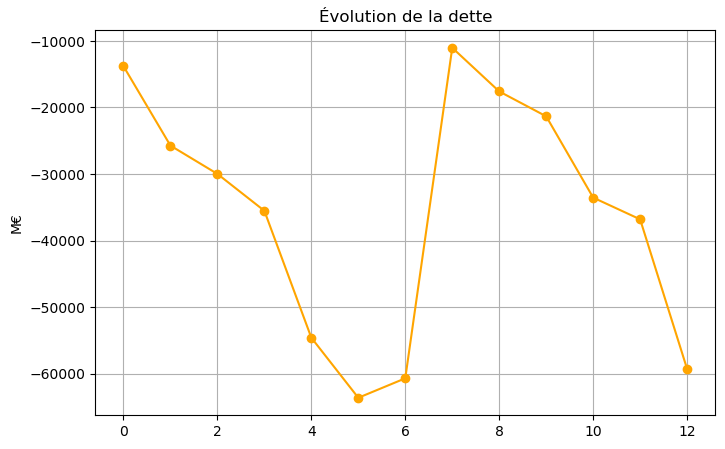

In [31]:
plt.figure(figsize=(8,5))
plt.plot(df_ach.index, df_ach['dette_m'], marker='o', color='orange')
plt.title("Évolution de la dette")
plt.ylabel("M€")
plt.grid()
plt.show()

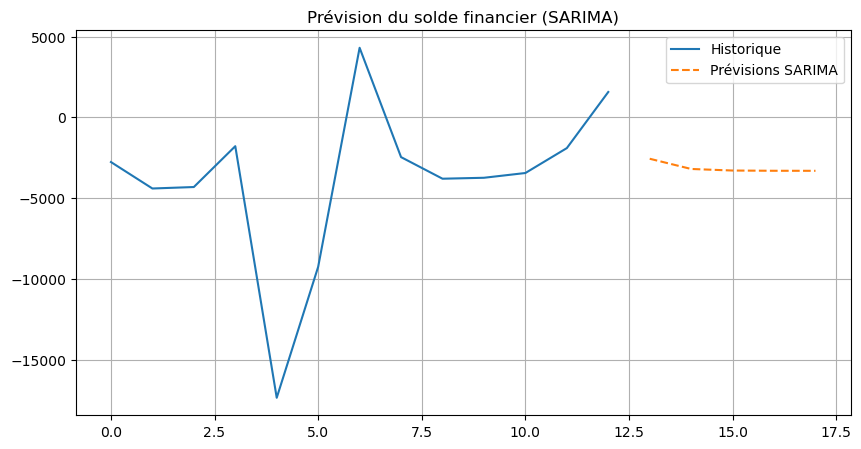

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

ts = df_ach['solde_financier_m']

model = SARIMAX(ts, order=(1,1,1), seasonal_order=(0,0,0,0))
result = model.fit(disp=False)

forecast = result.get_forecast(steps=5)
predicted = forecast.predicted_mean

plt.figure(figsize=(10,5))
plt.plot(ts, label="Historique")
plt.plot(predicted, label="Prévisions SARIMA", linestyle='--')
plt.title("Prévision du solde financier (SARIMA)")
plt.legend()
plt.grid()